In [1]:
from iads import loading_data as loader
from iads import traitement_data as traitement

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Chargement des données

bson -> DF

In [2]:
df_avis = loader.load_dataframe("avis.bson")

In [3]:
df_jeux = loader.load_dataframe("details.bson")

## Fichier jeux

In [4]:
df_jeux.head()

,Nombre d'avis rectifiés,Note rectifiée,url,Note Finkel,Nombre d'avis,_id,titre,casting,Note,categories,description,gameplay,full_title
0,10.0,8.40,https://www.trictrac.net/jeu-de-societe/marvel...,8.74,19.0,63c5790a08b9fb9fd8f26ec8,Marvel United,Par Eric Lang et Andrea ChiarvesioIllustré par...,7.58,NaN,\n Marvel United : Unis c...,1 à 4|14 ans et +|45,Marvel United (2020)
1,17.0,7.29,https://www.trictrac.net/jeu-de-societe/mariposas,7.68,33.0,63c5790a08b9fb9fd8f26ec9,Mariposas,Par Elizabeth HargraveIllustré par Matt Paquet...,7.39,NaN,"\n Chaque année, au print...",2 à 5|14 ans et +|60,Mariposas (2020)
2,9.0,7.22,https://www.trictrac.net/jeu-de-societe/quetzal,7.42,28.0,63c5790b08b9fb9fd8f26eca,Quetzal,Par Alexandre GarciaIllustré par Nastya LehnÉd...,8.18,Enchères|Aventures dans la jungle|Collection /...,\n Vous êtes à la tête d’...,2 à 5|8 ans et +|45,Quetzal (2020)
3,0.0,0.00,https://www.trictrac.net/jeu-de-societe/alien-...,0.00,4.0,63c5790b08b9fb9fd8f26ecb,Alien - Kit de Démarrage,Édité par Arkhane Asylum Publishing,9.00,NaN,\n Un Kit de démarrage co...,à partir de 1|12 ans et +|~,Alien - Kit de Démarrage (2020)
4,24.0,8.79,https://www.trictrac.net/jeu-de-societe/the-loop,9.70,72.0,63c5790b08b9fb9fd8f26ecc,The LOOP,Par Maxime Rambourg et Théo RivièreIllustré pa...,8.75,Card-driven|Combinaison|Coopération|Deck build...,\n Le Dr Foo a créé une t...,1 à 4|12 ans et +|60,The LOOP (2020)


1. Existence des jeux dupliqués

On supprime l'attribut `_id` généré par le `scrapping` pour mettre en evidences la duplication des jeux

In [5]:
df_jeux_up = df_jeux.drop(["_id"], axis=1)
df_jeux_up = df_jeux_up.drop_duplicates()

In [6]:
len_before = len(df_jeux)
len_after  = len(df_jeux_up)

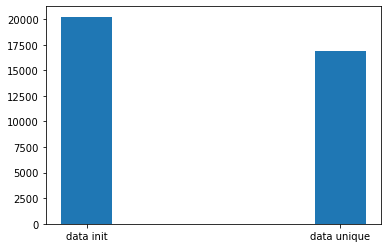

In [7]:
plt.bar(['data init', 'data unique'], [len_before, len_after], width=0.2)
plt.show()

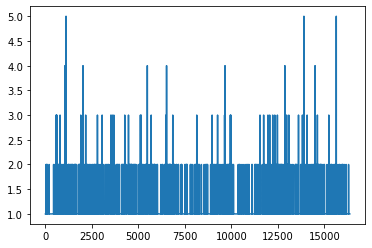

In [8]:
val, counts = np.unique(df_jeux_up["titre"], return_counts=True)

plt.plot(counts)
plt.show()

2. Version des jeux !!

In [9]:
list_same_title = []

for v in val[counts != 1]:
    a = df_avis[df_avis["title"] == v]
    
    if len(a) > 1:
        list_same_title.append(a)

In [10]:
list_same_title[1].head()

,title,note,author,url,comment,_id,review_href,date_published,treated,title_review
163033,1830,5.4,Mesophylle,https://www.trictrac.net/jeu-de-societe/1830-0...,"Un petit wargame assez light, aux règles très ...",63c67b8a993b727dc2a9c9ce,https://www.trictrac.net/avis/pour-les-belges-...,2013-03-12 14:23:55,True,Pour les Belges (et surtout Bruxellois) friand...
241489,1830,10.0,20.100,https://www.trictrac.net/jeu-de-societe/1830/a...,Le plus intéressant avec ce jeu est que le has...,63c68339993b727dc2aafc46,https://www.trictrac.net/avis/le-bonheur-d-etr...,2001-11-19 12:28:35,True,le bonheur d'être le meilleur
241490,1830,10.0,maksen,https://www.trictrac.net/jeu-de-societe/1830/a...,Il faut pas mal de combustible pour s'attaquer...,63c68339993b727dc2aafc47,https://www.trictrac.net/avis/fais-chauffer-la...,2012-09-11 12:29:05,True,Fais chauffer la chaudière !
241491,1830,10.0,Elendriel,https://www.trictrac.net/jeu-de-societe/1830/a...,Le premier de la série déclancheur de l'engoue...,63c68339993b727dc2aafc48,https://www.trictrac.net/avis/le-premier-4,2011-11-07 12:29:02,True,le premier
241492,1830,10.0,Wufnir,https://www.trictrac.net/jeu-de-societe/1830/a...,Les pertie que j'ai faites se sont terminées d...,63c68339993b727dc2aafc49,https://www.trictrac.net/avis/excellent-82,2005-07-29 12:28:39,True,Excellent


In [11]:

df_jeux_up["_id"] = df_jeux_up.apply(traitement.update_title_jeux, axis=1)

df_jeux_up.head()

,Nombre d'avis rectifiés,Note rectifiée,url,Note Finkel,Nombre d'avis,titre,casting,Note,categories,description,gameplay,full_title,_id
0,10.0,8.40,https://www.trictrac.net/jeu-de-societe/marvel...,8.74,19.0,Marvel United,Par Eric Lang et Andrea ChiarvesioIllustré par...,7.58,NaN,\n Marvel United : Unis c...,1 à 4|14 ans et +|45,Marvel United (2020),marvel-united
1,17.0,7.29,https://www.trictrac.net/jeu-de-societe/mariposas,7.68,33.0,Mariposas,Par Elizabeth HargraveIllustré par Matt Paquet...,7.39,NaN,"\n Chaque année, au print...",2 à 5|14 ans et +|60,Mariposas (2020),mariposas
2,9.0,7.22,https://www.trictrac.net/jeu-de-societe/quetzal,7.42,28.0,Quetzal,Par Alexandre GarciaIllustré par Nastya LehnÉd...,8.18,Enchères|Aventures dans la jungle|Collection /...,\n Vous êtes à la tête d’...,2 à 5|8 ans et +|45,Quetzal (2020),quetzal
3,0.0,0.00,https://www.trictrac.net/jeu-de-societe/alien-...,0.00,4.0,Alien - Kit de Démarrage,Édité par Arkhane Asylum Publishing,9.00,NaN,\n Un Kit de démarrage co...,à partir de 1|12 ans et +|~,Alien - Kit de Démarrage (2020),alien-kit-de-demarrage
4,24.0,8.79,https://www.trictrac.net/jeu-de-societe/the-loop,9.70,72.0,The LOOP,Par Maxime Rambourg et Théo RivièreIllustré pa...,8.75,Card-driven|Combinaison|Coopération|Deck build...,\n Le Dr Foo a créé une t...,1 à 4|12 ans et +|60,The LOOP (2020),the-loop


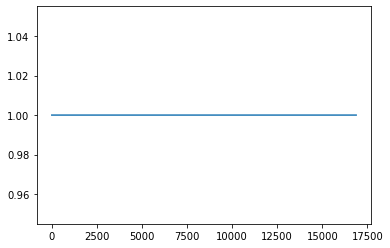

In [12]:
val, counts = np.unique(df_jeux_up["_id"], return_counts=True)

plt.plot(counts)
plt.show()

In [13]:
df_jeux_up.head()

,Nombre d'avis rectifiés,Note rectifiée,url,Note Finkel,Nombre d'avis,titre,casting,Note,categories,description,gameplay,full_title,_id
0,10.0,8.40,https://www.trictrac.net/jeu-de-societe/marvel...,8.74,19.0,Marvel United,Par Eric Lang et Andrea ChiarvesioIllustré par...,7.58,NaN,\n Marvel United : Unis c...,1 à 4|14 ans et +|45,Marvel United (2020),marvel-united
1,17.0,7.29,https://www.trictrac.net/jeu-de-societe/mariposas,7.68,33.0,Mariposas,Par Elizabeth HargraveIllustré par Matt Paquet...,7.39,NaN,"\n Chaque année, au print...",2 à 5|14 ans et +|60,Mariposas (2020),mariposas
2,9.0,7.22,https://www.trictrac.net/jeu-de-societe/quetzal,7.42,28.0,Quetzal,Par Alexandre GarciaIllustré par Nastya LehnÉd...,8.18,Enchères|Aventures dans la jungle|Collection /...,\n Vous êtes à la tête d’...,2 à 5|8 ans et +|45,Quetzal (2020),quetzal
3,0.0,0.00,https://www.trictrac.net/jeu-de-societe/alien-...,0.00,4.0,Alien - Kit de Démarrage,Édité par Arkhane Asylum Publishing,9.00,NaN,\n Un Kit de démarrage co...,à partir de 1|12 ans et +|~,Alien - Kit de Démarrage (2020),alien-kit-de-demarrage
4,24.0,8.79,https://www.trictrac.net/jeu-de-societe/the-loop,9.70,72.0,The LOOP,Par Maxime Rambourg et Théo RivièreIllustré pa...,8.75,Card-driven|Combinaison|Coopération|Deck build...,\n Le Dr Foo a créé une t...,1 à 4|12 ans et +|60,The LOOP (2020),the-loop


In [14]:
df_jeux_up["creators"] = df_jeux_up.apply(traitement.extract_creators, axis=1)
df_jeux_up["illustrators"] = df_jeux_up.apply(traitement.extract_illustrators, axis=1)
df_jeux_up["editors"] = df_jeux_up.apply(traitement.extract_editors, axis=1)
df_jeux_up["distributors"] = df_jeux_up.apply(traitement.extract_distributors, axis=1)

In [20]:
import re

game_play = df_jeux_up["gameplay"].iloc[-2]

print(game_play)

[nb_joueurs, age_requis, temps_part] = game_play.split("|")

print(nb_joueurs)
nb_joueurs = re.sub(r'[a-zA-zà]*', '', nb_joueurs)

print(nb_joueurs)

jusqu'à 2|14 à 99 |240 
jusqu'à 2
'2


In [16]:
df_jeux_up["gameplay"]

0              1 à 4|14 ans et +|45 
1              2 à 5|14 ans et +|60 
2               2 à 5|8 ans et +|45 
3        à partir de 1|12 ans et +|~
4              1 à 4|12 ans et +|60 
                    ...             
20228           2 à 4|4 ans et +|10 
20229        jusqu'à 2|14 à 99 |180 
20230        jusqu'à 2|14 à 99 |180 
20231        jusqu'à 2|14 à 99 |240 
20232           2 à 6|4 ans et +|15 
Name: gameplay, Length: 16873, dtype: object

In [17]:

tmp = df_jeux_up[df_jeux_up["creators"].isna() & df_jeux_up["illustrators"].isna() & df_jeux_up["distributors"].isna() & df_jeux_up["editors"].isna()]
len(tmp)

286

In [18]:

tmp = df_jeux_up[df_jeux_up["creators"].isna() & df_jeux_up["illustrators"].isna() & df_jeux_up["distributors"].isna() & df_jeux_up["casting"].isna() & df_jeux_up["editors"].isna()]

len(tmp)

286